## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [4]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [5]:
print(df.head())
print(df.tail())

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     82
3  2008-08-01 00:00:00        c#    503
4  2008-08-01 00:00:00       c++    164
                     DATE     TAG  POSTS
2826  2025-07-01 00:00:00     php    117
2827  2025-07-01 00:00:00  python   1014
2828  2025-07-01 00:00:00       r    218
2829  2025-07-01 00:00:00    ruby     14
2830  2025-07-01 00:00:00   swift    166


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [6]:
df.shape

(2831, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [7]:
df.count()

DATE     2831
TAG      2831
POSTS    2831
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [8]:
df.groupby('TAG')['POSTS'].sum().sort_values(ascending=False)

TAG
javascript    2528303
python        2209491
java          1918679
c#            1624055
php           1465243
c++            814550
r              510756
c              407983
swift          336225
ruby           229297
go              74386
perl            68345
delphi          52505
assembly        45133
Name: POSTS, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [9]:
df.groupby('TAG')['DATE'].count().sort_values(ascending=False)

TAG
c#            205
assembly      204
c             204
c++           204
delphi        204
java          204
python        204
javascript    204
perl          204
php           204
ruby          204
r             202
swift         195
go            189
Name: DATE, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [10]:
print(type(df['DATE'][4]))
pd.to_datetime(df['DATE'][1])

<class 'str'>


Timestamp('2008-08-01 00:00:00')

In [11]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [12]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [13]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [14]:
pivot_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivot_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [15]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.shape

(205, 14)

In [16]:
reshaped_df.head()
# reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1638.0,752.0,104.0,NaN,1121.0,629.0,128.0,473.0,534.0,6.0,285.0,NaN
2008-10-01,16.0,302.0,1982.0,804.0,112.0,NaN,1142.0,720.0,128.0,603.0,504.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1728.0,733.0,139.0,NaN,951.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


In [17]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [18]:
reshaped_df.count() # number of entries per language

TAG
assembly      204
c             204
c#            205
c++           204
delphi        204
go            189
java          204
javascript    204
perl          204
php           204
python        204
r             202
ruby          204
swift         195
dtype: int64

In [19]:
reshaped_df.fillna(0, inplace=True) # fill missing values with 0
reshaped_df.head()
# reshaped_df.isna().values.any() # check if there are any missing values


TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,220.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1638.0,752.0,104.0,0.0,1121.0,629.0,128.0,473.0,534.0,6.0,285.0,0.0
2008-10-01,16.0,302.0,1982.0,804.0,112.0,0.0,1142.0,720.0,128.0,603.0,504.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1728.0,733.0,139.0,0.0,951.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

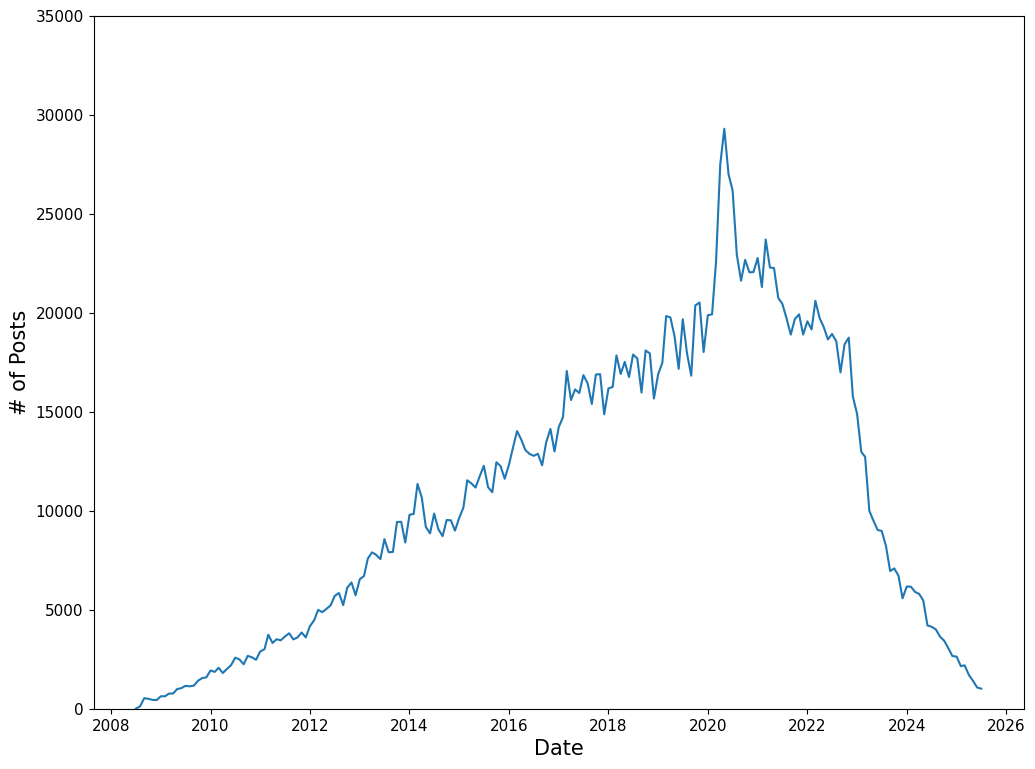

In [ ]:
plt.figure(figsize=(12, 9))
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.xlabel("Date", fontsize=15)
plt.ylabel("# of Posts", fontsize=15)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['python'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

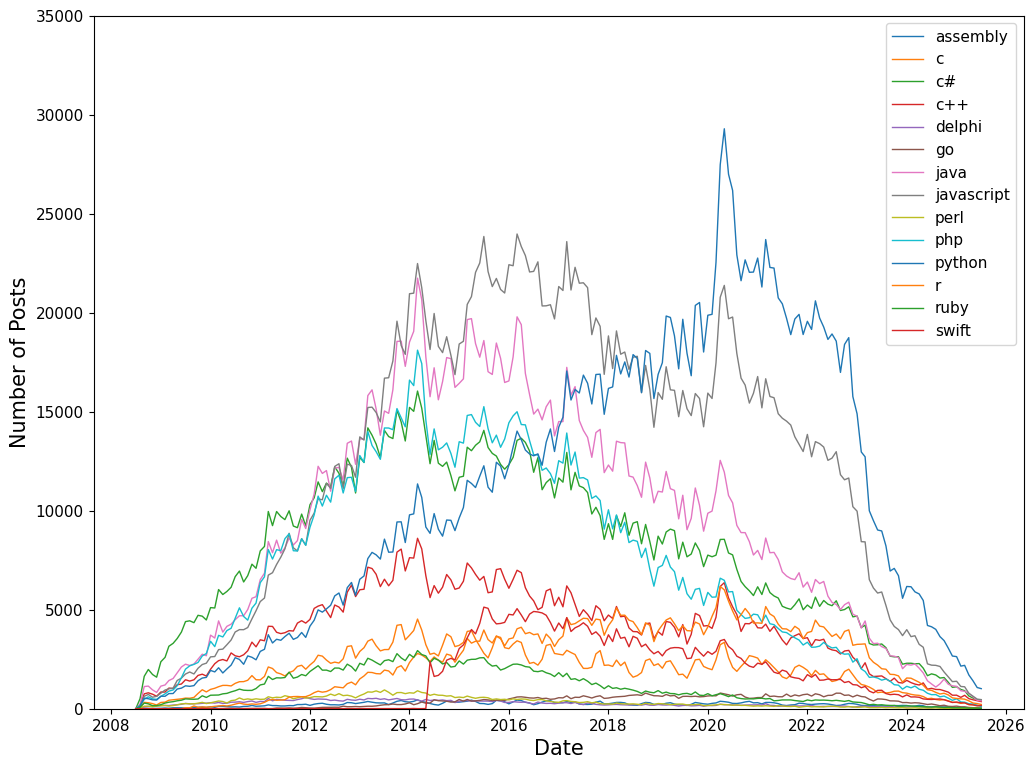

In [59]:
plt.figure(figsize=(12, 9))     # giving a specific size to our frame
plt.xticks(fontsize=11)     # changing the fontsize of each point in the x-axis
plt.yticks(fontsize=11)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Number of Posts", fontsize=15)
plt.ylim(0, 35000)  # setting lower and upper bounds in the y-axis

for column in reshaped_df.columns:  # getting the names of all the columns in the dataframe
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=1, label=reshaped_df[column].name)   # plotting all columns 1 after another 

plt.legend(fontsize=11)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 